## Logistic Regression Unbalanced Data Binary Class (Diabetes) 

## Import Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [26]:
df = pd.read_csv("diabetes.csv")

**Bu veri seti, Amerika'nın Arizona eyaletinde yaşayan Pima Kızılderilileri arasında 21 yaş ve üzeri kadınlarda diyabet olasılığını tahmin etmek için kullanılır.**

Pima Indian Diabetes veri setinde genellikle şu sütunlar bulunur:

**Pregnancies:** Kişinin kaç kez hamile kaldığı.

**Glucose:** 2 saatlik oral glukoz tolerans testindeki plazma glukoz konsantrasyonu.

**BloodPressure:** Diyastolik kan basıncı (mm Hg).

**SkinThickness:** Triceps deri kıvrım kalınlığı (mm).

**Insulin:** 2 saatlik serum insulin miktarı (mu U/ml).

**BMI:** Vücut kitle indeksi (ağırlık in kg / (boy in m)^2).

**DiabetesPedigreeFunction:** Diyabet soy geçmişi fonksiyonu.

**Age:** Yaş (yıl olarak).

**Outcome**: 0 veya 1 değerini alır. 1, diyabetin pozitif olarak test edildiğini; 0 ise negatif olarak test edildiğini gösterir. (Target)



# EDA

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [10]:
# Inusilin'de std yuksek, oynaklik fazla. std > ortalama bu da outlier isareti.  
# Inusilin zaten seker hastalarinda yuksek, bu beklenen gercek bir durum, outlier diye hemen atma, domain knowledge kullan.
# ML'de outlier yaklaşımında çok hassas davranmak lazım
# min degerler 0. Glikoz 0 olamaz! 
# BDI 0 olamaz. 

In [14]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
96,2,92,62,28,0,31.600,0.130,24,0
159,17,163,72,41,114,40.900,0.817,47,1
581,6,109,60,27,0,25.000,0.206,27,0
259,11,155,76,28,150,33.300,1.353,51,1
311,0,106,70,37,148,39.400,0.605,22,0
642,6,147,80,0,0,29.500,0.178,50,1
378,4,156,75,0,0,48.300,0.238,32,1
42,7,106,92,18,0,22.700,0.235,48,0
39,4,111,72,47,207,37.100,1.390,56,1
247,0,165,90,33,680,52.300,0.427,23,0


In [27]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* 0'lar 1'lerden fazla.  Lokum gibi unbalance :)

In [17]:
df.Outcome.value_counts(normalize = True) # oransal olarak gormek icin

0   0.651
1   0.349
Name: Outcome, dtype: float64

Deneklerin %65'inde diabet yok, %35'inde var.

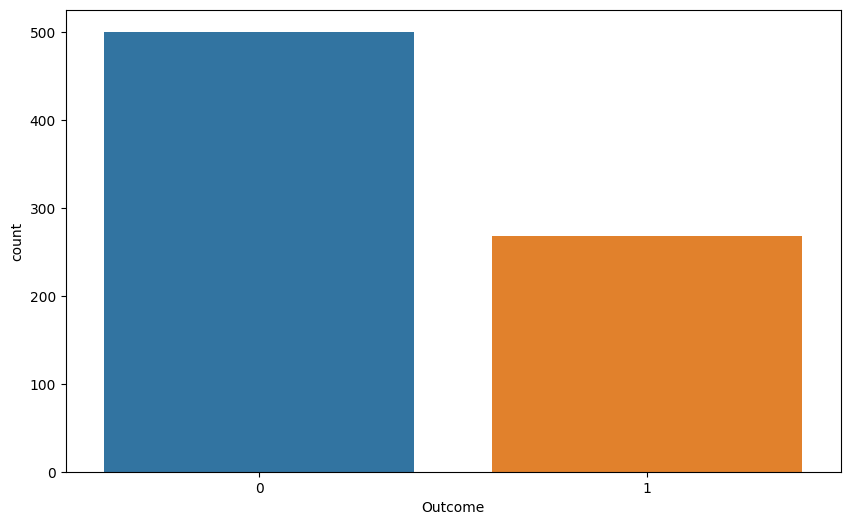

In [18]:
sns.countplot(df.Outcome)
plt.show()

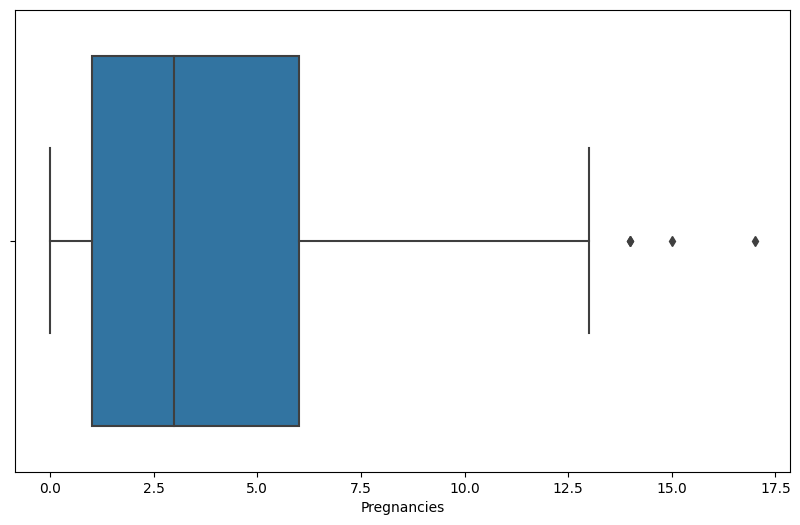

In [20]:
# Boxplot ile outlier kontrolu yapalim;

sns.boxplot(df.Pregnancies);

* 17 gebelik mumkun, outlierlerini silemeyiz. 

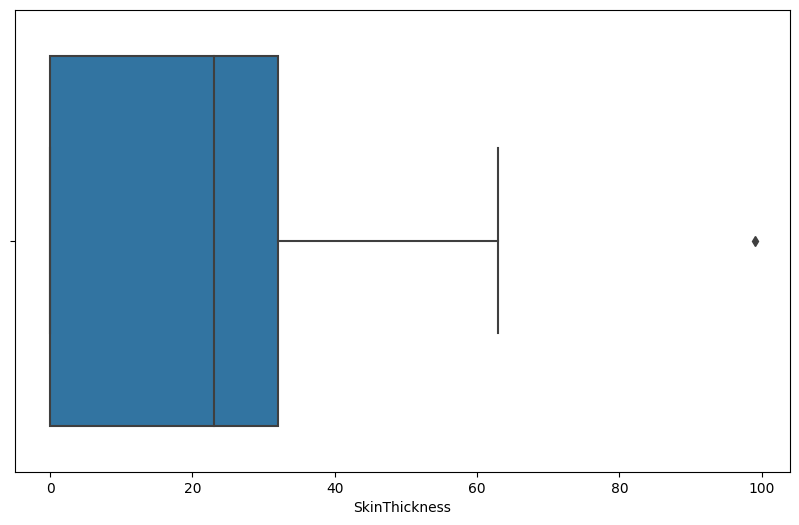

In [21]:
sns.boxplot(df.SkinThickness);

* SkinThickness 80'den asagi olmali. 100 outlier bunu atabiliriz.

In [28]:
df = df[df.SkinThickness < 80]  # 100 olani attik

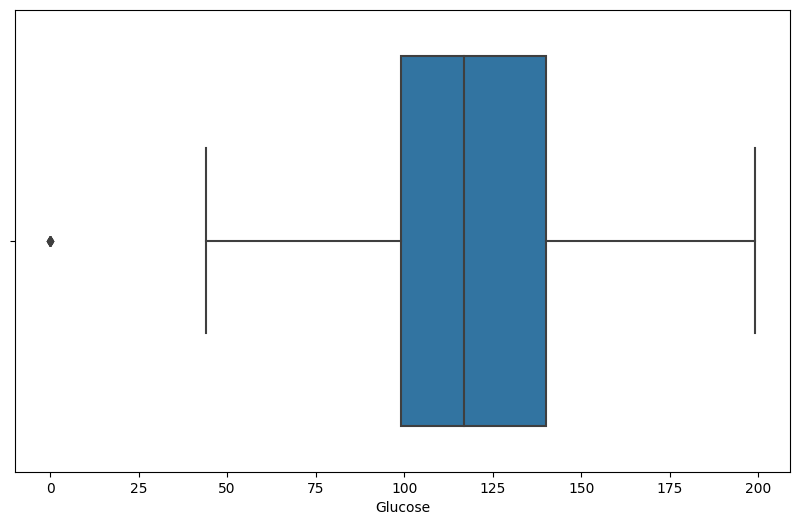

In [29]:
sns.boxplot(df.Glucose);

* o olani atalim

In [30]:
df = df[df.Glucose > 0]  # 0 olani attik

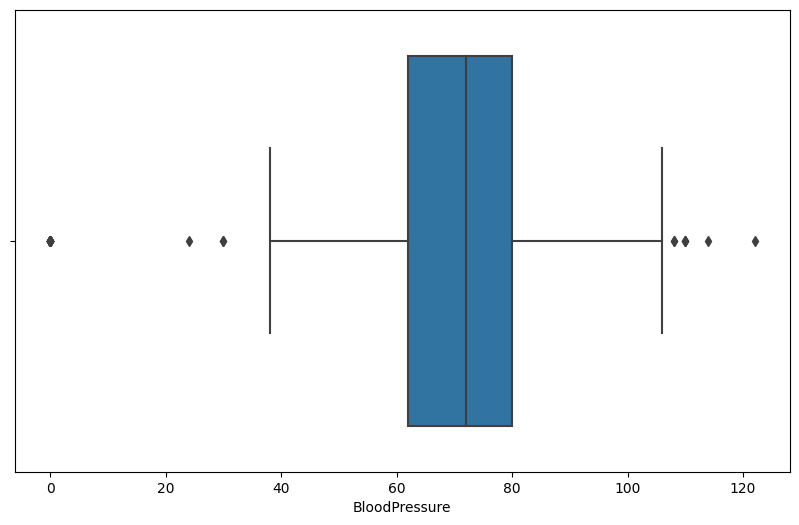

In [25]:
sns.boxplot(df.BloodPressure);

* 35'ten buyuk olmali

In [31]:
df = df[df.BloodPressure > 35]

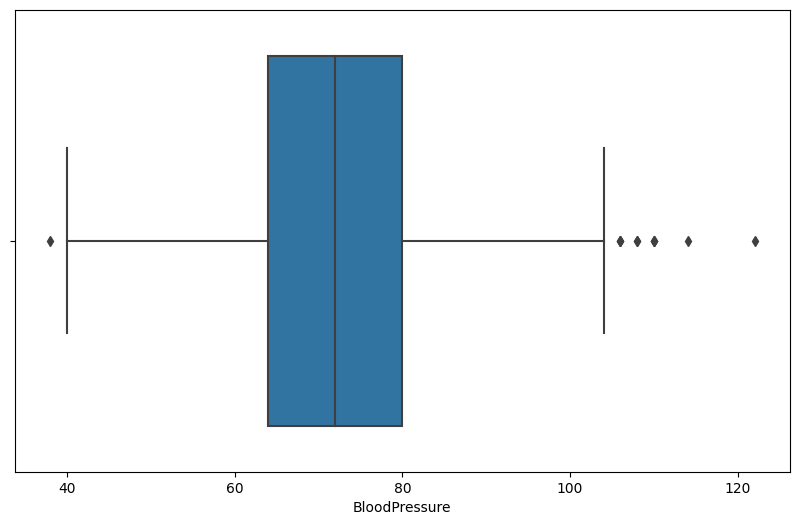

In [27]:
# Kontrol edelim;

sns.boxplot(df.BloodPressure);

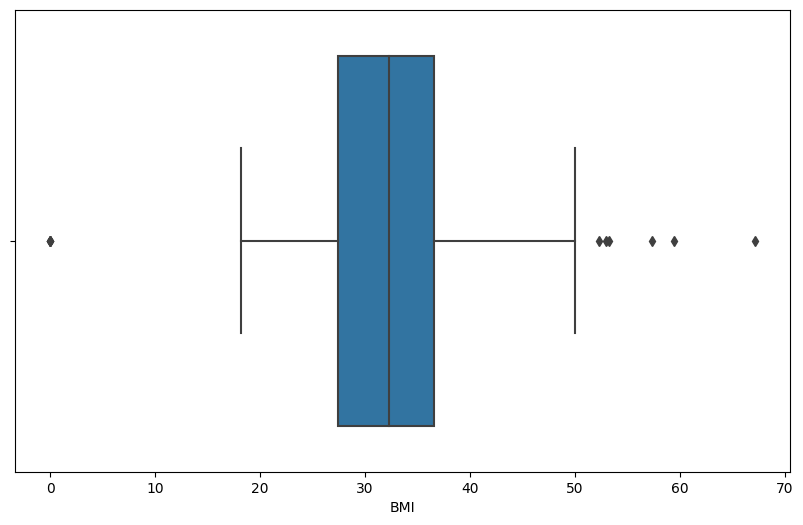

In [29]:
sns.boxplot(df.BMI);

* BMI 0 olamaz. 

In [32]:
df = df[df.BMI > 0]

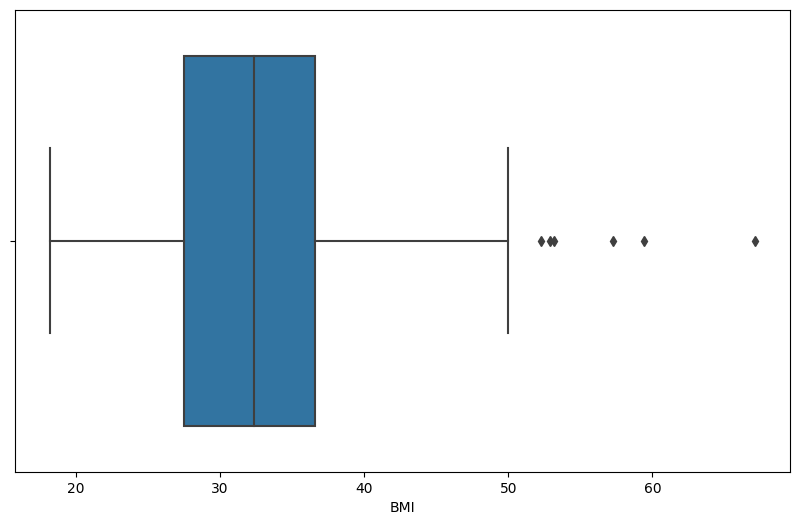

In [31]:
sns.boxplot(df.BMI);

In [32]:
df.shape

(720, 9)

* 768'den 720'ye dustu 48 gozlem atildi veri setinden.

In [34]:
df.Outcome.value_counts() # elimizde kalanlar

0    473
1    247
Name: Outcome, dtype: int64

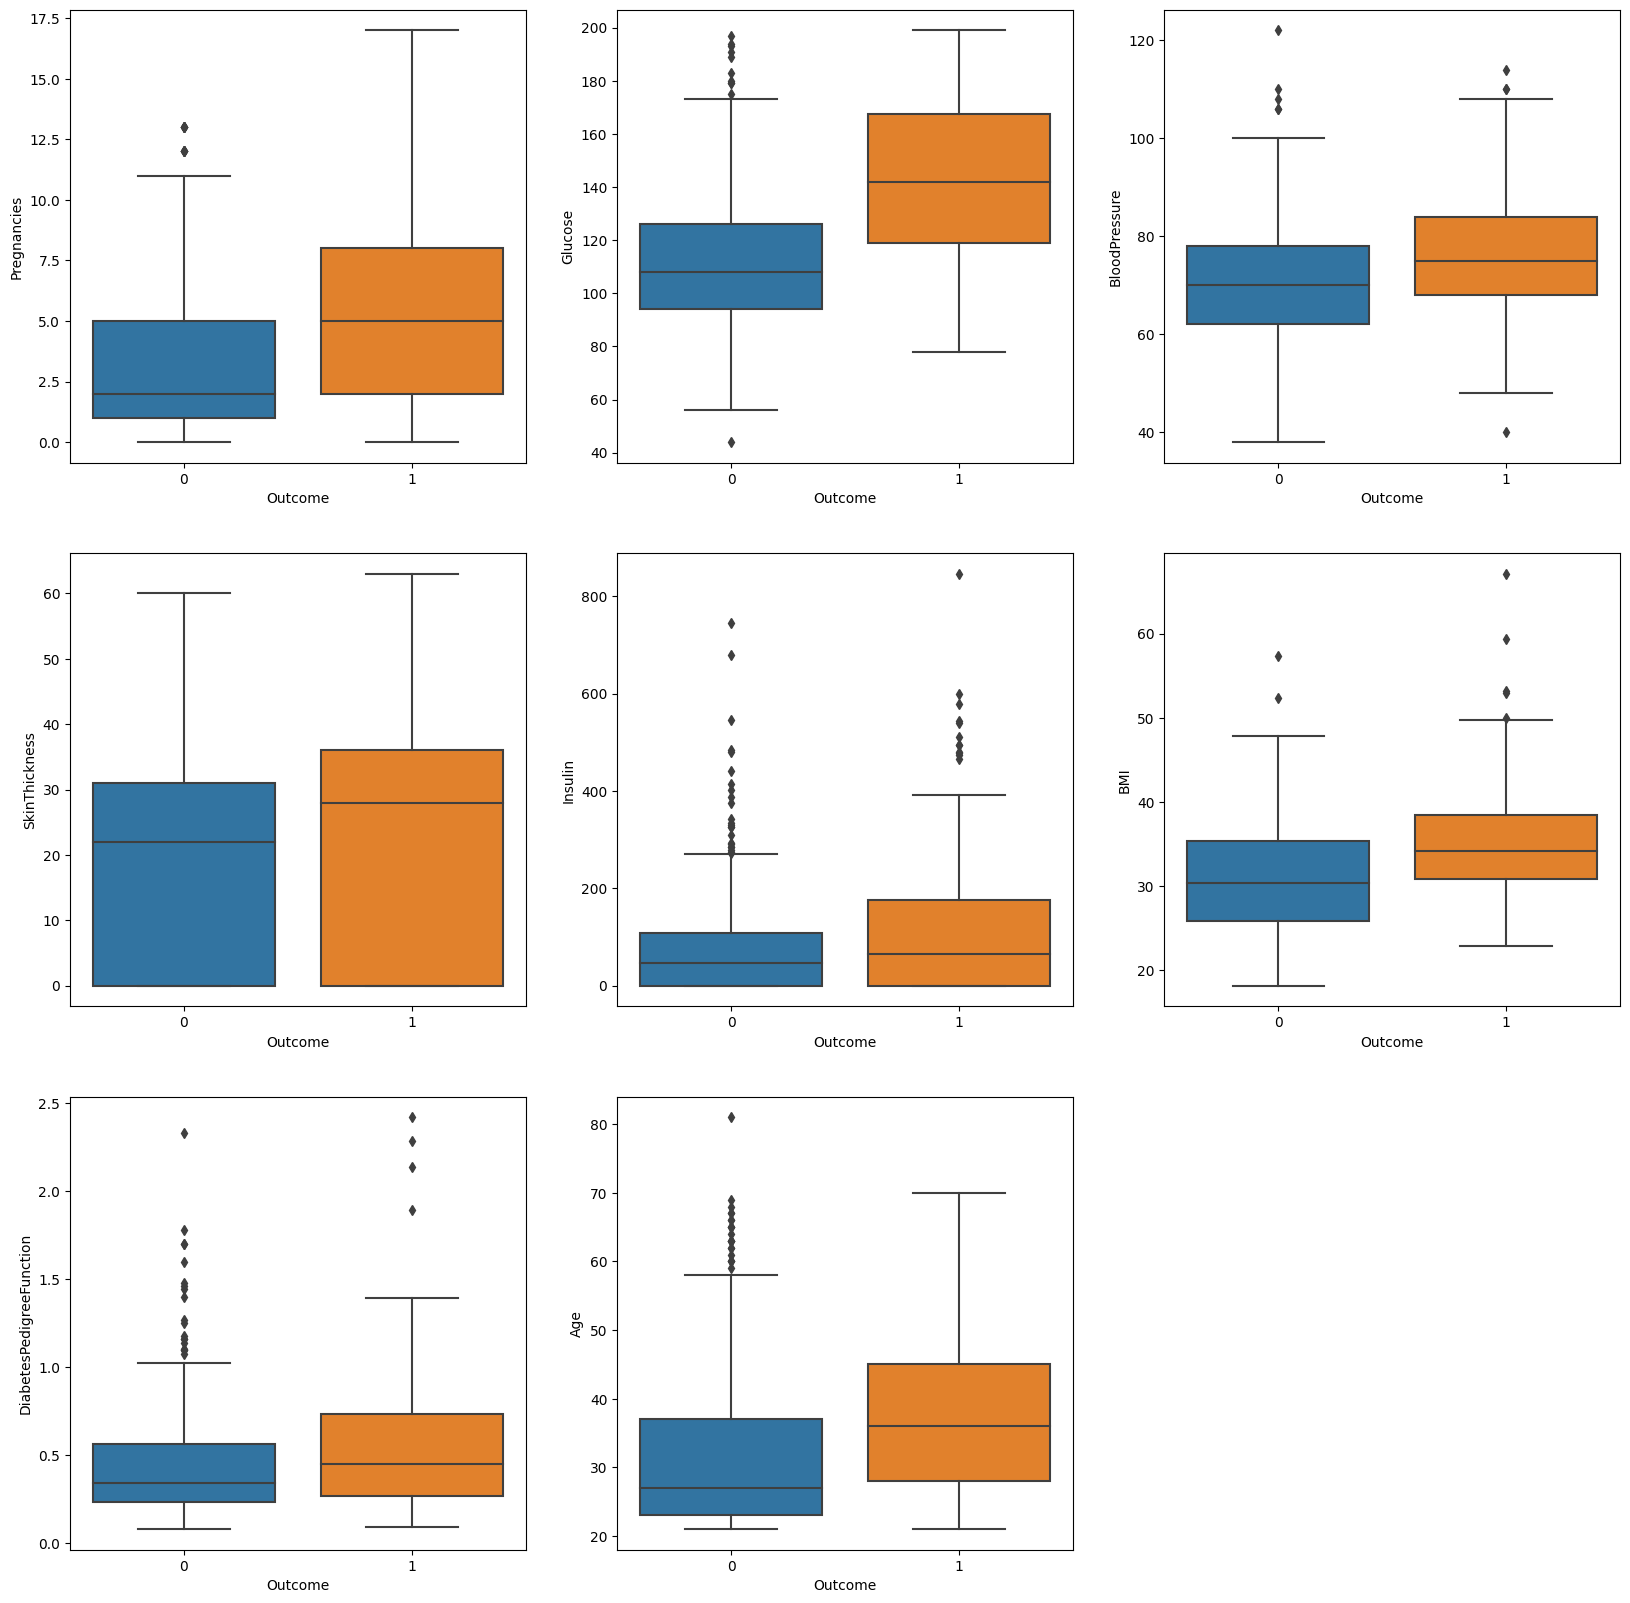

In [35]:
# Siniflara gore boxplotlar

index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

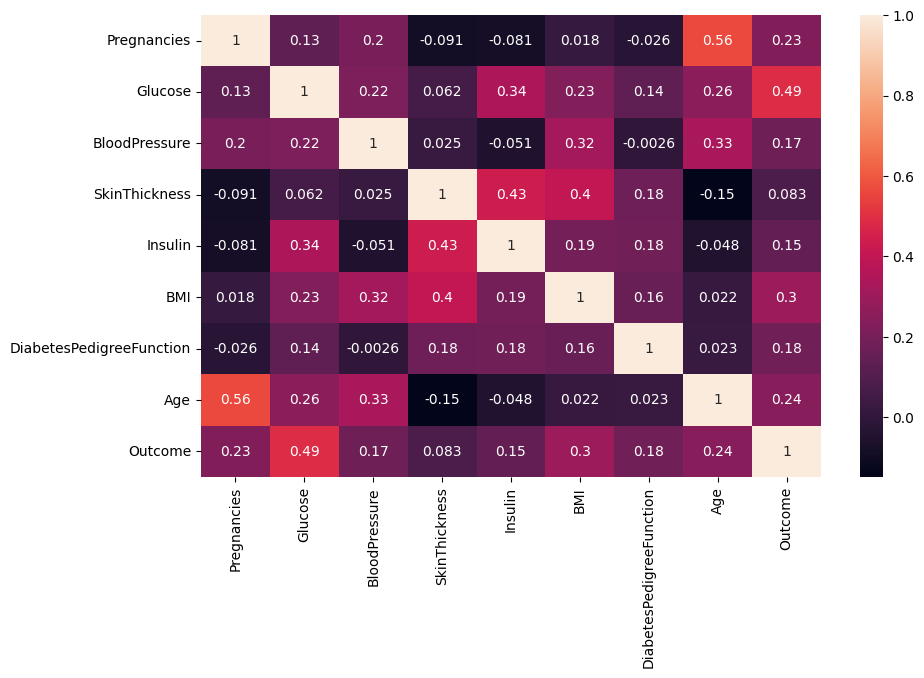

In [37]:
sns.heatmap(df.corr(), annot = True);

In [ ]:
# Multicollinearty sorunu gozukmuyor.

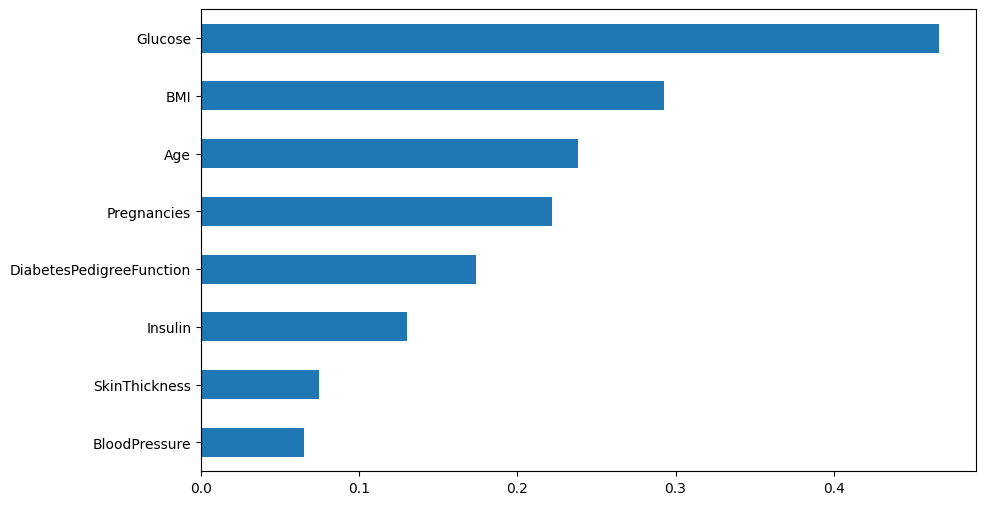

In [4]:
# Target ile featurelerin iliski duzeyleri;

df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
plt.show()

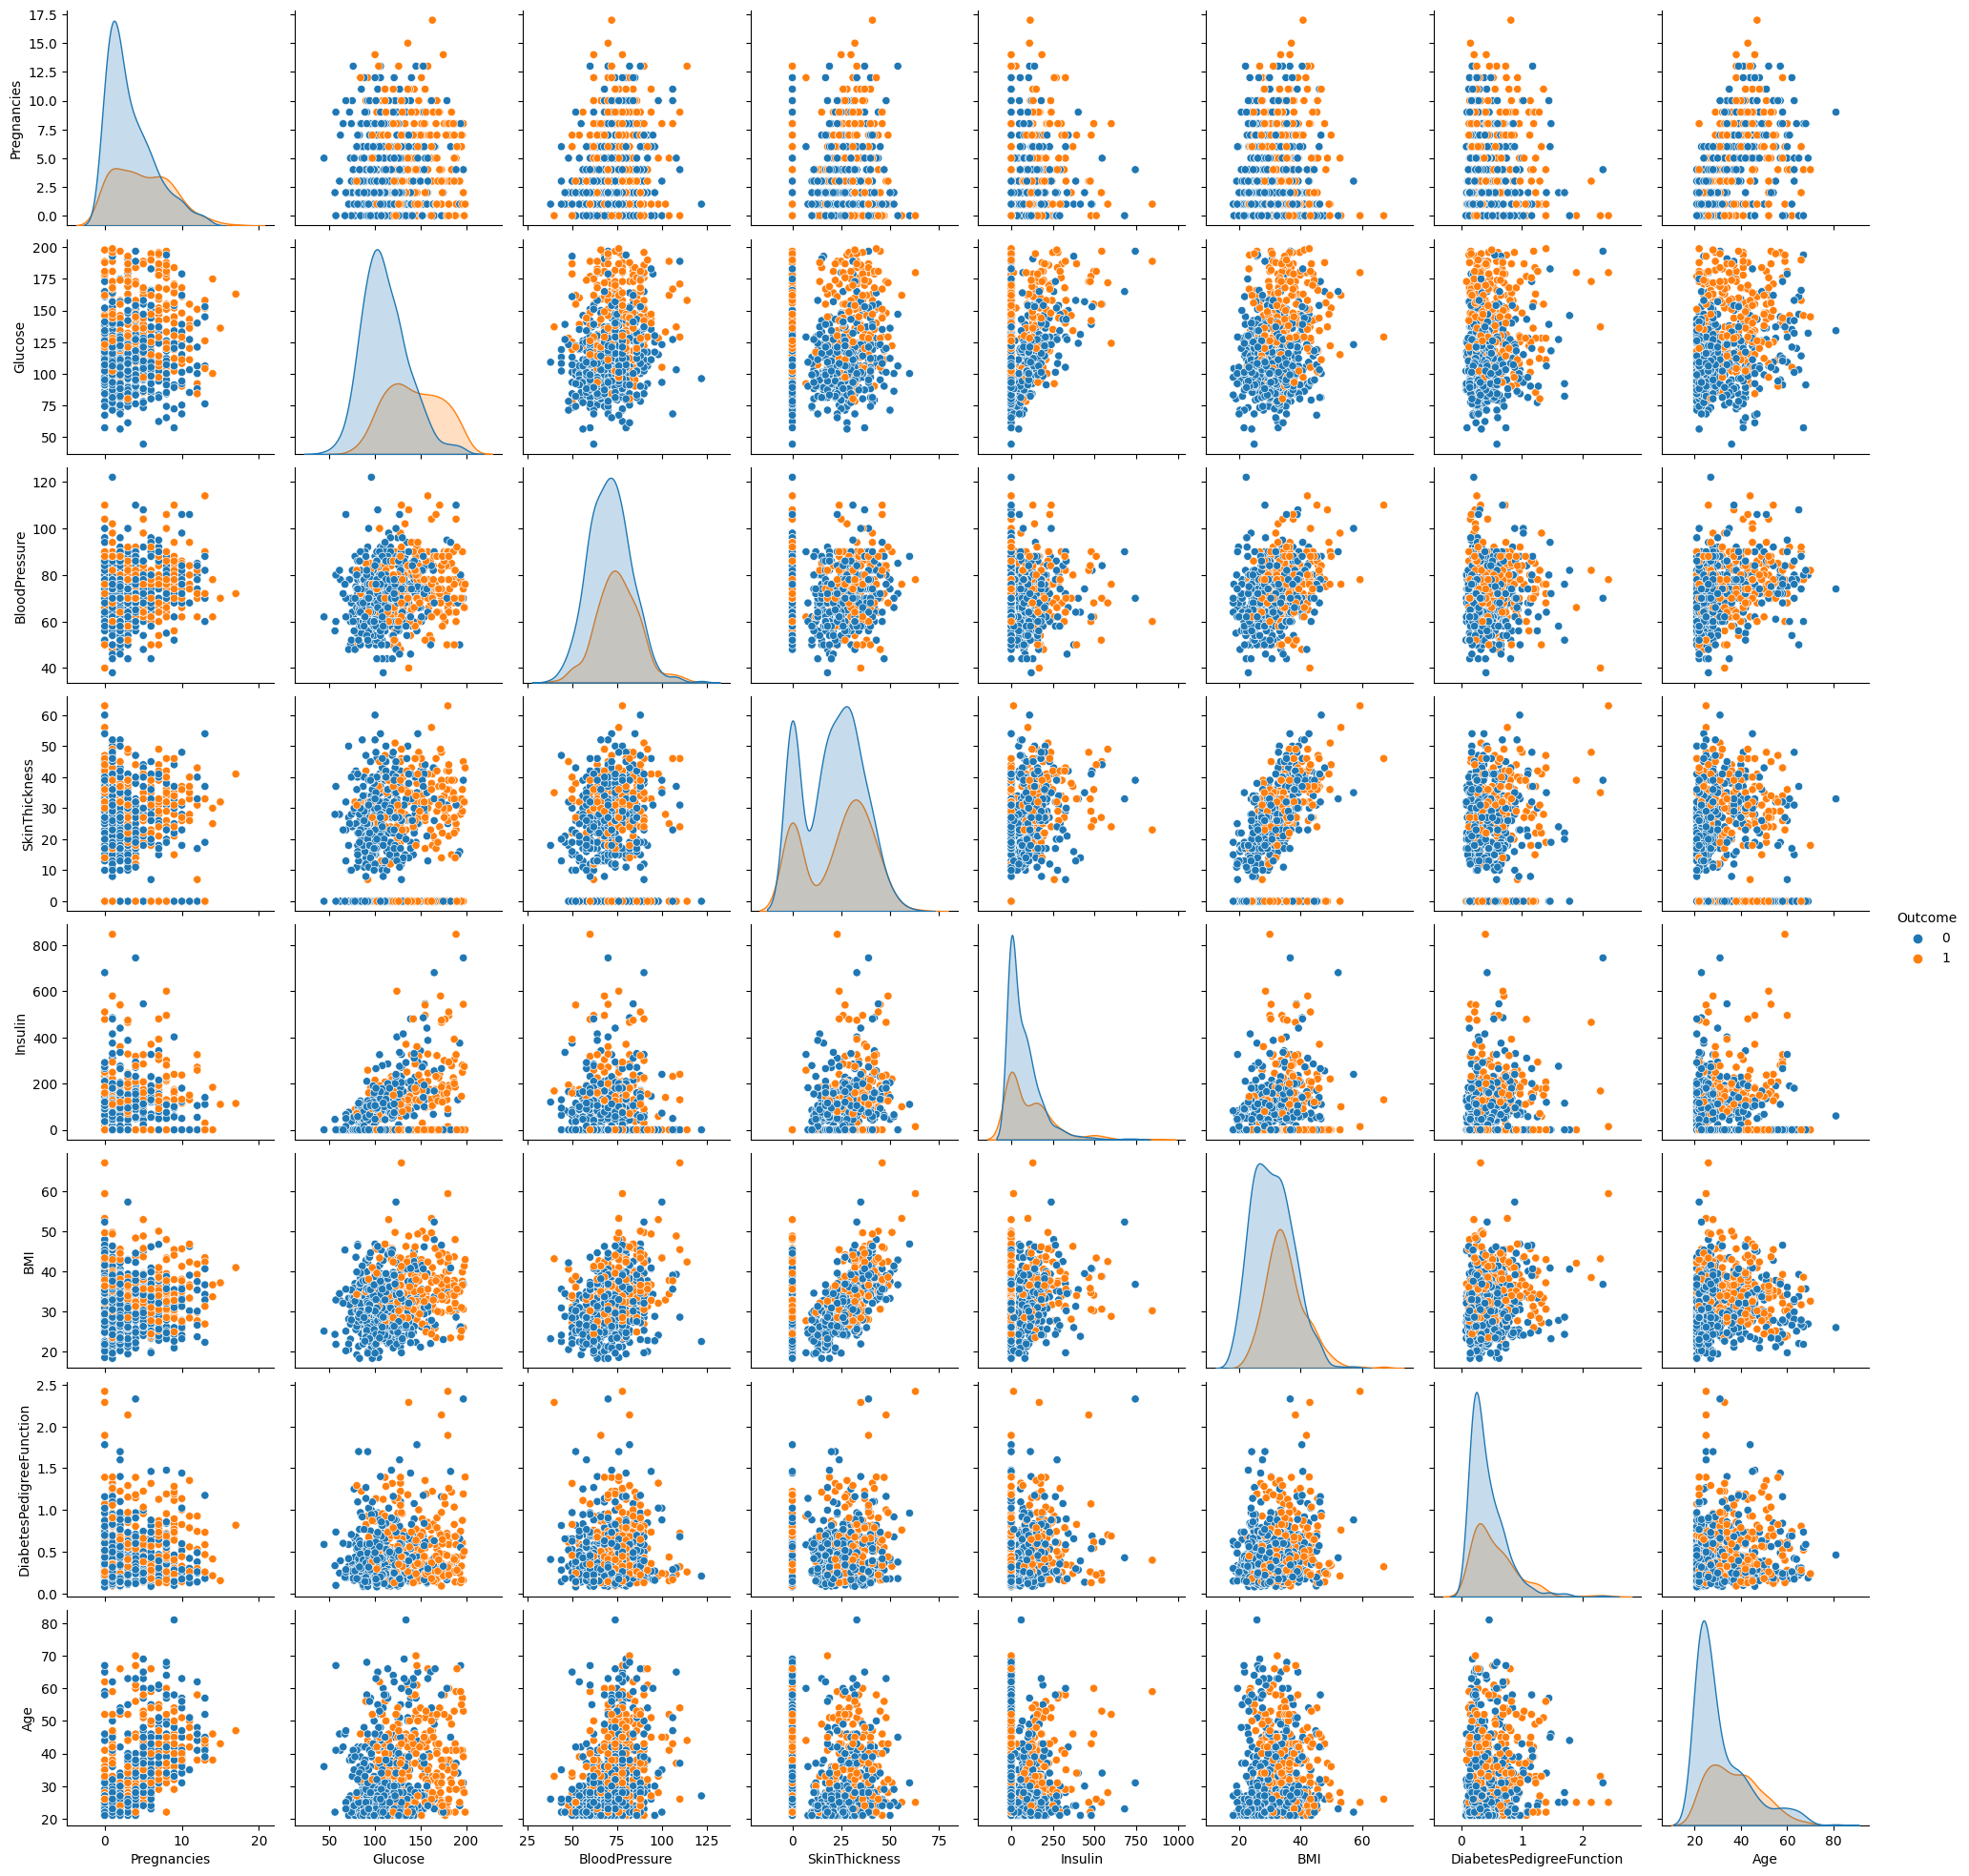

In [39]:
sns.pairplot(df, hue = "Outcome");

* Cok ic ice modelin ayirmasi zor duruyor. 

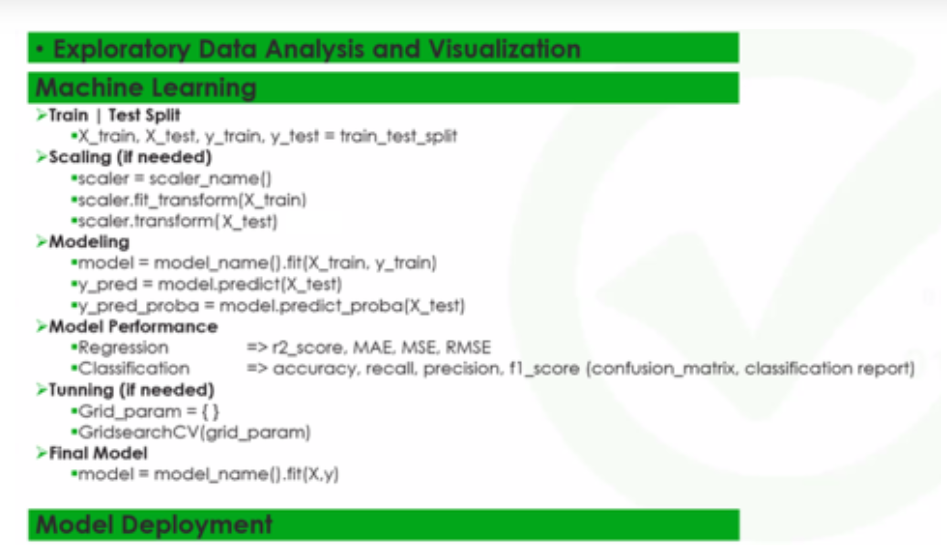

## Train-Test Split

In [35]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# "stratify=y"  Datanin Train ve Test olarak dagitilmasi sirasinda 1 ve 0'lari esit miktarda (test size'e verdigimiz oranda) olacak sekide dagitir. 
# Data seti azsa ve siniflar arasi fark coksa (yani unbalance ise) "stratify=y" yi kullan.
# 0'lardan da %20, 1'lerden de %20 alir Test datasini secerken. 

stratify=y

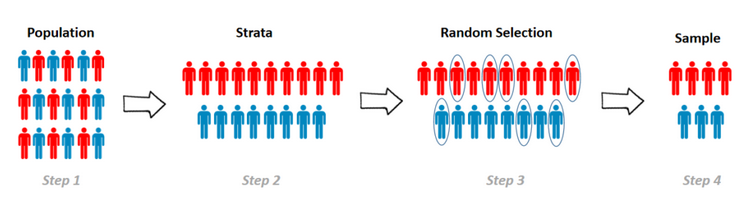

## Scalling

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model=LogisticRegression()

In [42]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
y_pred=log_model.predict(X_test_scaled)

In [44]:
y_pred_proba=log_model.predict_proba(X_test_scaled)

In [45]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
559,11,85,74,0,0,30.100,0.300,35,0,0,0.183
628,5,128,80,0,0,34.600,0.144,45,0,0,0.379
741,3,102,44,20,94,30.800,0.400,26,0,0,0.160
586,8,143,66,0,0,34.900,0.129,41,1,1,0.652
700,2,122,76,27,200,35.900,0.483,26,0,0,0.260
174,2,75,64,24,55,29.700,0.370,33,0,0,0.045
469,6,154,78,41,140,46.100,0.571,27,0,1,0.861
102,0,125,96,0,0,22.500,0.262,21,0,0,0.063
363,4,146,78,0,0,38.500,0.520,67,1,1,0.712
47,2,71,70,27,0,28.000,0.586,22,0,0,0.039


## Model Performance

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [48]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



* ilk kisimda 1'in recall, f1 degerleri dusuk. Hedef class'in skorlari dusuk. recall = 0.59 model seker hastalarinin %60'ini dogru tespit edebiliyor. 

* Precision 0.50 civarinda cikarsa model Yazi-Tura gibi davraniyor deriz.

## CV

In [ ]:
# Normalde yapmayacagiz ama manuiel yapip ogrenelim CV yi.

In [49]:
from sklearn.model_selection import cross_validate

In [50]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.007,0.006,0.600,0.450,0.514,0.707
2,0.006,0.003,0.643,0.450,0.529,0.724
3,0.000,0.000,0.923,0.600,0.727,0.845
4,0.005,0.006,0.857,0.600,0.706,0.828
5,0.006,0.005,0.706,0.600,0.649,0.776
6,0.005,0.004,0.647,0.550,0.595,0.741
7,0.004,0.004,0.714,0.526,0.606,0.772
8,0.004,0.004,0.647,0.579,0.611,0.754
9,0.004,0.004,0.733,0.550,0.629,0.772
10,0.004,0.004,0.625,0.500,0.556,0.719


In [52]:
# CV islemoe ait scorlarin ortalamalarini alalim;
df_scores.mean()[2:]

test_precision   0.710
test_recall      0.541
test_f1          0.612
test_accuracy    0.764
dtype: float64

* Bu CV souclarini 1 claslari ilke karsilastiracagiz. 

* CV sonuclari train kismiyla uyumlu. OVERFIT yok.

## CV for "0" Class

In [54]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [55]:
# Modeli sifirlayalim

model = LogisticRegression() # model sıfırlanır
scores = cross_validate(model, X_train_scaled, y_train,scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0},
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.004,0.003,0.744,0.842,0.790
2,0.010,0.005,0.750,0.868,0.805
3,0.000,0.000,0.822,0.974,0.892
4,0.017,0.004,0.818,0.947,0.878
5,0.003,0.004,0.805,0.868,0.835
6,0.003,0.004,0.780,0.842,0.810
7,0.004,0.003,0.791,0.895,0.840
8,0.003,0.000,0.800,0.842,0.821
9,0.000,0.000,0.786,0.892,0.835
10,0.016,0.000,0.756,0.838,0.795


* "0" clasina ait skorlar. 

In [75]:
df_scores.mean()[2:]

test_precision_0   0.785
test_recall_0      0.881
test_f1_0          0.830
dtype: float64

* CV tum datayi temsil eder. 
* Bu sonucu hem train hem de test ile karsilastir. Train ile uyumlu test ile uyumsuz ise OVERFIT vardir.


**Normalinde CV ler olmayacak NB de**

## Grid Search

In [56]:
np.logspace(-1, 5, 20) ## C parametresi değerleri

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [57]:
from sklearn.model_selection import GridSearchCV

In [60]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight=['balanced', None]
solver = ['liblinear', 'sag', 'saga'] # l1 ile lbfgs cakisiyor. Buraya lbfgs'yi koyma.

param_grid = {"penalty" : penalty,
             "C" : C,
             "class_weight": class_weight,
             "solver" : solver}

grid_model = GridSearchCV(estimator= model,
                          param_grid= param_grid,
                         cv = 10,
                         scoring = "recall",
                         n_jobs = -1) ## -1 Tüm işlemcileri buraya yönlendirmek için kullanılır.

In [61]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='recall')

In [63]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='recall')

In [65]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [66]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)